# Population in Ireland

Summarise your dataset clearly, using relevant descriptive statistics and appropriate plots. These should be carefully motivated and justified, and clearly presented. You should critically analyse your findings, in addition to including the necessary Python code, output and plots in the report. You are required to plot at least three graphs.

### Data preparation and Visualization
1. You must perform appropriate EDA on your dataset, rationalizing and detailing why you chose the specific methods and what insight you gained. [0-20]

#### 1 Importing Libraries and Declaring functions

### Programming  
1. The project must be explored programmatically, this means that you must implement suitable Python tools (code and/or libraries) to complete the analysis required. All of this is to be implemented in a Jupyter Notebook. Your codebook should be properly annotated. The project documentation must include sound justifications and explanation of your code choices (code quality standards should also be applied). [0-50]

In [1]:
#import library packages
import numpy as np
import seaborn as sns #visualisation 
import matplotlib.pyplot as plt
from scipy import stats
import pandas as pd

In [50]:
#get outliers by feature
def get_outliers_by_feature(df, feature):
    """get outliers dataframe by feature and plotting the graphics of boxplots before and after
    Args:
            df (Dataframe): [Dataset]
            feature (str): [column]
    """
    # Group by Council
    df_population_by = df.groupby(feature).sum("Value")
    
    # show outliers
    sns.boxplot(x=df_population_by['Value']) 
    plt.title("")
    plt.xlabel('Council')
    plt.ylabel('Population')
    plt.show()
    
    # calculating quartiles
    Q1 = df_population_by['Value'].quantile(0.25)
    Q3 = df_population_by['Value'].quantile(0.75) 

    print("Calculating quartiles") 
    print(f"Quartile 3 = {Q3}") 
    print(f"Quartile 1 = {Q1}") 
    
    IQR = Q3 - Q1
    print(f"IQR = {IQR}") 
    
    # print outliers
    df_atypical = df_population_by[((df_population_by['Value'] < (Q1 - 1.5 * IQR)) |(df_population_by['Value'] > (Q3 + 1.5 * IQR)))]
    
    # removing outliers
    df_without_atypical = df_population_by[~((df_population_by['Value'] < (Q1 - 1.5 * IQR)) |(df_population_by['Value'] > (Q3 + 1.5 * IQR)))]
    df_without_atypical.shape
    
    sns.boxplot(x=df_without_atypical['Value']) 
    plt.show()
    print("Outliers")
    return df_atypical

#### 2. Loading Data

In [4]:
#Load the Population
df_population = pd.read_csv("population.csv")

In [5]:
# To display the top 5 rows 
df_population.head()

,Statistic Label,Census Year,Administrative Counties 2019,Age,Sex,UNIT,VALUE
0,Population,2022,Carlow County Council,Age 0-4,Males,Number,1800
1,Population,2022,Carlow County Council,Age 0-4,Females,Number,1736
2,Population,2022,Carlow County Council,Age 0-4,Both Sexes,Number,3536
3,Population,2022,Carlow County Council,Age 5-9,Males,Number,2063
4,Population,2022,Carlow County Council,Age 5-9,Females,Number,2026


In [6]:
# To display the bottom 5 rows
df_population.tail()

,Statistic Label,Census Year,Administrative Counties 2019,Age,Sex,UNIT,VALUE
1819,Population,2022,Ireland,Age 85 and over,Females,Number,52834
1820,Population,2022,Ireland,Age 85 and over,Both Sexes,Number,84441
1821,Population,2022,Ireland,Total,Males,Number,2544549
1822,Population,2022,Ireland,Total,Females,Number,2604590
1823,Population,2022,Ireland,Total,Both Sexes,Number,5149139


#### 3. Checking the types of data

In [7]:
# Total number of rows and columns Before Cleaning
df_population.shape
first_size = df_population.shape
print(f"Original Size of Data {first_size}")

Original Size of Data (1824, 7)


In [8]:
# Checking the data type 
df_population.dtypes

Statistic Label                 object
Census Year                      int64
Administrative Counties 2019    object
Age                             object
Sex                             object
UNIT                            object
VALUE                            int64
dtype: object

#### 4. Dropping irrelevant columns

In [9]:
# Dropping irrelevant columns
df_population = df_population.drop(["Statistic Label",'Census Year','UNIT'], axis=1)
df_population.head(3)

,Administrative Counties 2019,Age,Sex,VALUE
0,Carlow County Council,Age 0-4,Males,1800
1,Carlow County Council,Age 0-4,Females,1736
2,Carlow County Council,Age 0-4,Both Sexes,3536


#### 5. Renaming the columns

In [10]:
# Renaming the column names
df_population =df_population.rename(columns={"Administrative Counties 2019": "Council","VALUE" : "Value"})
df_population.head(3) 

,Council,Age,Sex,Value
0,Carlow County Council,Age 0-4,Males,1800
1,Carlow County Council,Age 0-4,Females,1736
2,Carlow County Council,Age 0-4,Both Sexes,3536


#### 6. Dropping the duplicate rows

In [11]:
# Rows containing duplicate data
duplicate_rows_df = df_population[df_population.duplicated()]
print("number of duplicate rows: ", duplicate_rows_df.shape)

number of duplicate rows:  (0, 4)


The data do not have duplicates

##### Cleaning grouped data rows

In [12]:
# Uniques Values from Age
df_population["Age"].unique()

array(['Age 0-4', 'Age 5-9', 'Age 10-14', 'Age 15-19', 'Age 20-24',
       'Age 25-29', 'Age 30-34', 'Age 35-39', 'Age 40-44', 'Age 45-49',
       'Age 50-54', 'Age 55-59', 'Age 60-64', 'Age 65-69', 'Age 70-74',
       'Age 75-79', 'Age 80-84', 'Age 85 and over', 'Total'], dtype=object)

The rows contain summarized rows by Age which is called "Total", now we need to delete these rows because we can get them by groupings

In [13]:
# Deleting Rows with Values "Total" in Age
df_population = df_population.loc[df_population["Age"] != "Total"]
df_population["Age"].unique()

array(['Age 0-4', 'Age 5-9', 'Age 10-14', 'Age 15-19', 'Age 20-24',
       'Age 25-29', 'Age 30-34', 'Age 35-39', 'Age 40-44', 'Age 45-49',
       'Age 50-54', 'Age 55-59', 'Age 60-64', 'Age 65-69', 'Age 70-74',
       'Age 75-79', 'Age 80-84', 'Age 85 and over'], dtype=object)

In [14]:
# Uniques Values from Sex
df_population["Sex"].unique()

array(['Males', 'Females', 'Both Sexes'], dtype=object)

The rows contain a summarized rows by sex which is called "Both Sexes", now we need to delete these rows because we can get them by groupings

In [15]:
# Deleting Rows with Values "Both Sexes" in Sex
df_population = df_population.loc[df_population["Sex"] != "Both Sexes"]
df_population["Sex"].unique()

array(['Males', 'Females'], dtype=object)

In [16]:
# Uniques Values from Council
df_population["Council"].unique()

array(['Carlow County Council', 'Dublin City Council',
       'Dún Laoghaire Rathdown County Council', 'Fingal County Council',
       'South Dublin County Council', 'Kildare County Council',
       'Kilkenny County Council', 'Laois County Council',
       'Longford County Council', 'Louth County Council',
       'Meath County Council', 'Offaly County Council',
       'Westmeath County Council', 'Wexford County Council',
       'Wicklow County Council', 'Clare County Council',
       'Cork City Council', 'Cork County Council', 'Kerry County Council',
       'Limerick City & County Council', 'Tipperary County Council',
       'Waterford City & County Council', 'Galway City Council',
       'Galway County Council', 'Leitrim County Council',
       'Mayo  County Council', 'Roscommon County Council',
       'Sligo County Council', 'Cavan County Council',
       'Donegal County Council', 'Monaghan County Council', 'Ireland'],
      dtype=object)

The rows contain anothers summarized rows by Counties which is called "Ireland", now we need to delete these rows because we can get them by groupings

In [17]:
df_population = df_population.loc[df_population["Council"] != "Ireland"]
df_population["Council"].unique()

array(['Carlow County Council', 'Dublin City Council',
       'Dún Laoghaire Rathdown County Council', 'Fingal County Council',
       'South Dublin County Council', 'Kildare County Council',
       'Kilkenny County Council', 'Laois County Council',
       'Longford County Council', 'Louth County Council',
       'Meath County Council', 'Offaly County Council',
       'Westmeath County Council', 'Wexford County Council',
       'Wicklow County Council', 'Clare County Council',
       'Cork City Council', 'Cork County Council', 'Kerry County Council',
       'Limerick City & County Council', 'Tipperary County Council',
       'Waterford City & County Council', 'Galway City Council',
       'Galway County Council', 'Leitrim County Council',
       'Mayo  County Council', 'Roscommon County Council',
       'Sligo County Council', 'Cavan County Council',
       'Donegal County Council', 'Monaghan County Council'], dtype=object)

##### Clean Repeated Texts  from rows

In [18]:
# Remove the text inncesary from the name column
df_population['Council'] = df_population['Council'].str.replace(' Council', '')

In [19]:
# change the value of a feature because is better for showing some plots
df_population['Age'] = df_population['Age'].str.replace('0-4', '0-04')
df_population['Age'] = df_population['Age'].str.replace('5-9', '05-09')

In [20]:
df_population.head(3)

,Council,Age,Sex,Value
0,Carlow County,Age 0-04,Males,1800
1,Carlow County,Age 0-04,Females,1736
3,Carlow County,Age 05-09,Males,2063


#### 7. Dropping the missing or null

In [21]:
# Rows containing nulls
null_mask = df_population.isnull().any(axis=1)
null_rows = df_population[null_mask]
print(null_rows)

Empty DataFrame
Columns: [Council, Age, Sex, Value]
Index: []


The data do not have nulls

In [22]:
# Total number of rows and columns before Cleaning Data
first_size

(1824, 7)

In [23]:
# Total number of rows and columns after Cleaning Data
df_population.shape

(1116, 4)

#### 8. Detecting Outliers

##### Outliers by councils

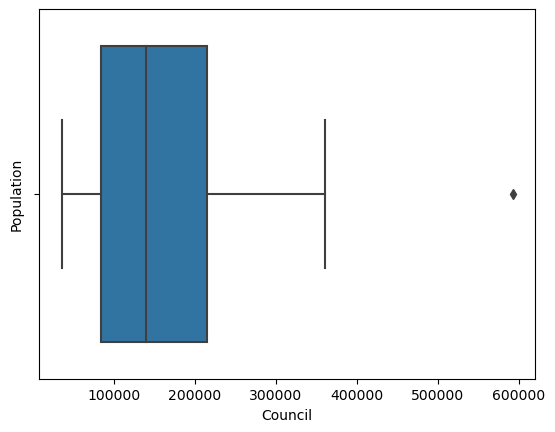

Calculating quartiles
Quartile 3 = 215181.0
Quartile 1 = 83782.0
IQR = 131399.0


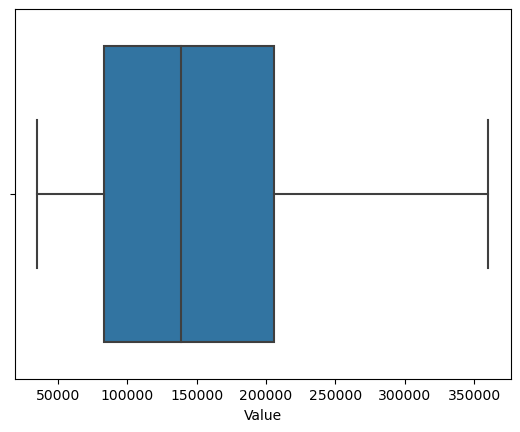

Outliers


,Value
Council,
Dublin City,592713


In [24]:
# Get outliers by Councils with plotboxes
get_outliers_by_feature(df_population, "Council")

##### Outliers by Age

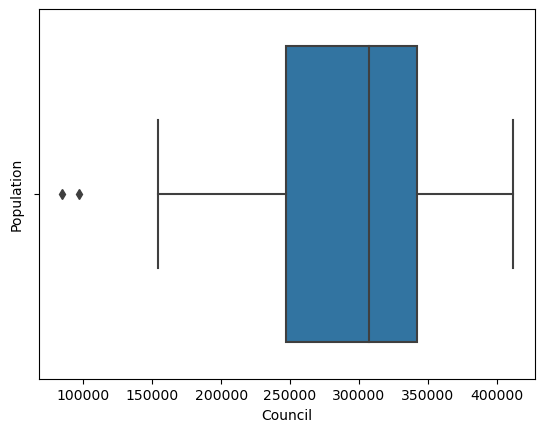

Calculating quartiles
Quartile 3 = 342003.25
Quartile 1 = 246775.5
IQR = 95227.75


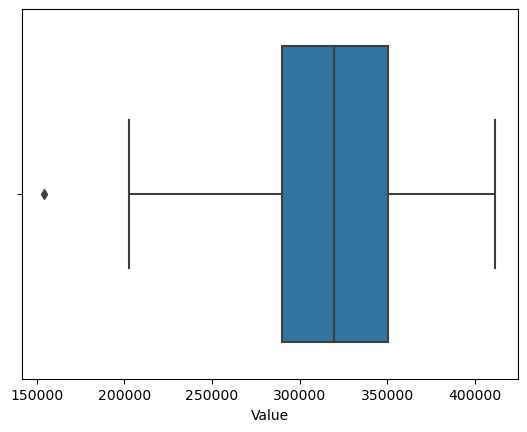

Outliers


,Value
Age,
Age 80-84,96586
Age 85 and over,84441


In [25]:
# Get outliers by Ages with plotboxes
get_outliers_by_feature(df_population, "Age")

### Data preparation and Visualization
4. All design and implementation of your visualizations must be justified and detailed in full., referring to Tufts Principles [0-20]

#### 9. Plot different features against one another (scatter), against frequency (histogram)

### Statistics
1. Summarise your dataset clearly, using relevant descriptive statistics and appropriate plots. These should be carefully motivated and justified, and clearly presented. You should critically analyse your findings, in addition to including the necessary Python code, output and plots in the report. You are required to plot at least three graphs. [0-35]

##### Population by Council

In [26]:
# Group by Council
df_population_by_councils = df_population.groupby('Council').sum("Value")
# Sort by population
df_population_by_councils.reset_index().sort_values('Value')

,Council,Value
15,Leitrim County,35199
17,Longford County,46751
0,Carlow County,61968
21,Monaghan County,65288
24,Sligo County,70198
23,Roscommon County,70259
1,Cavan County,81704
22,Offaly County,83150
9,Galway City,84414
14,Laois County,91877


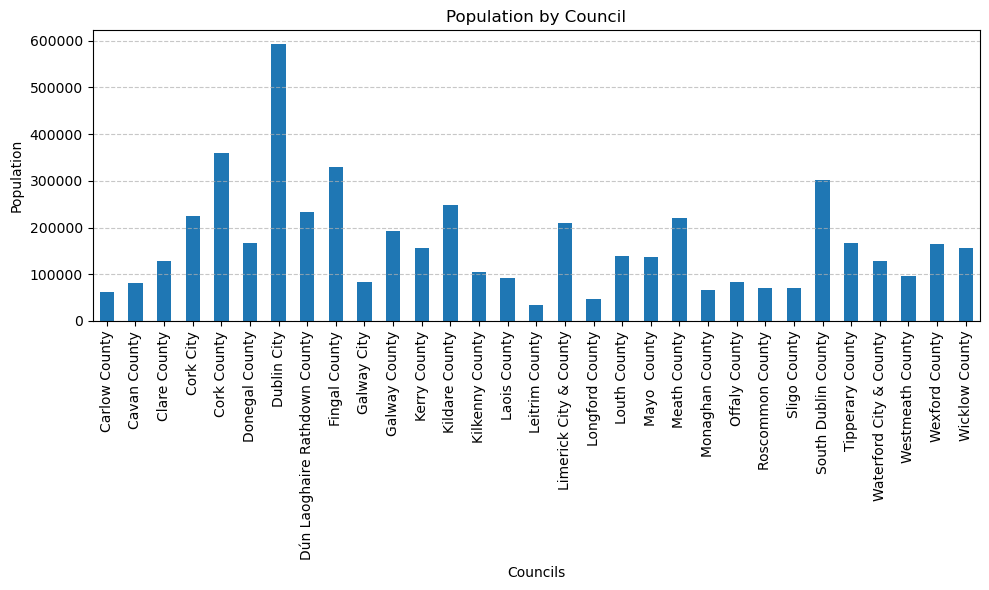

In [44]:
# Plotting the bar plot
df_population_by_councils.plot(kind='bar', figsize=(10, 6), legend = False)
plt.title('Population by Council')
plt.xlabel('Councils')
plt.ylabel('Population')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

##### Sex of Population by Council

In [28]:
df_council_sex = df_population.groupby(["Council","Sex"]).sum("Value").reset_index()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


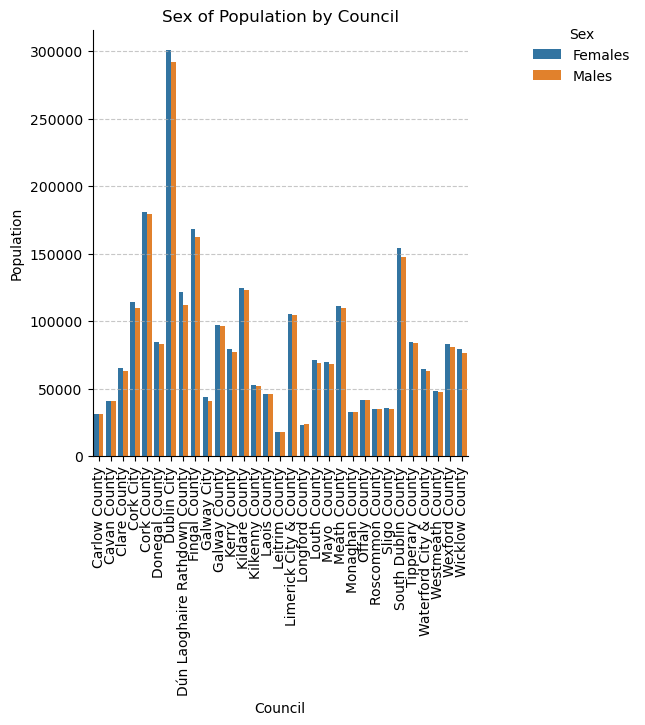

In [29]:
g = sns.catplot(
    x="Council",       # x variable name
    y="Value",       # y variable name
    hue="Sex",  # group variable name
    data=df_council_sex,     # dataframe to plot
    kind="bar",
)
plt.title('Sex of Population by Council')
plt.xlabel('Council')
plt.ylabel('Population')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.tight_layout()
sns.move_legend(g, "upper center", bbox_to_anchor=(1, 1), title='Sex')
plt.show()

###### Age of Population by Sex

In [30]:
df_sex = df_population.groupby(["Sex", "Age"]).sum("Value").reset_index()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


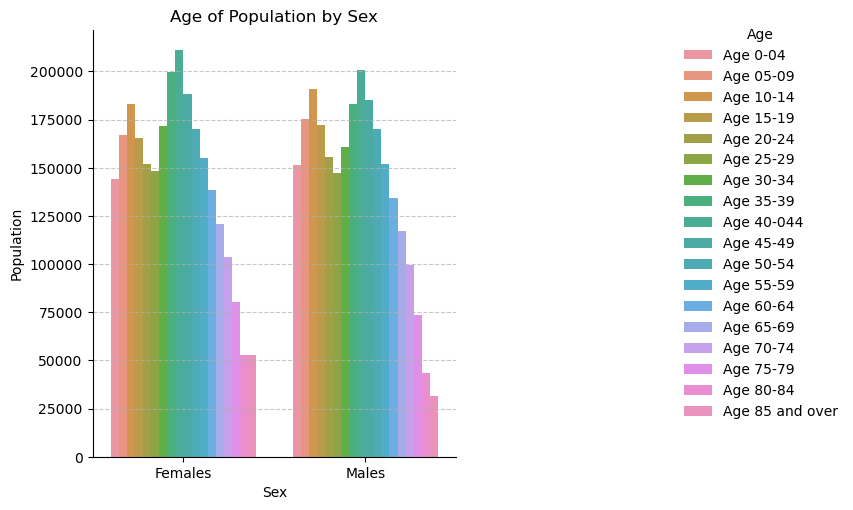

In [31]:
g = sns.catplot(
    x="Sex",       # x variable name
    y="Value",       # y variable name
    hue="Age",  # group variable name
    data=df_sex,     # dataframe to plot
    kind="bar",
)
plt.title('Age of Population by Sex')
plt.xlabel('Sex')
plt.ylabel('Population')
#plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.tight_layout()
sns.move_legend(g, "upper center", bbox_to_anchor=(1.2, 1), title='Age')
plt.show()


##### Sex of Population by Ages

In [32]:
df_age = df_population.groupby(["Age"]).sum("Value").reset_index()
df_age

,Age,Value
0,Age 0-04,295415
1,Age 05-09,342670
2,Age 10-14,374202
3,Age 15-19,337628
4,Age 20-24,307143
5,Age 25-29,295808
6,Age 30-34,332223
7,Age 35-39,382869
8,Age 40-044,411524
9,Age 45-49,373504


C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


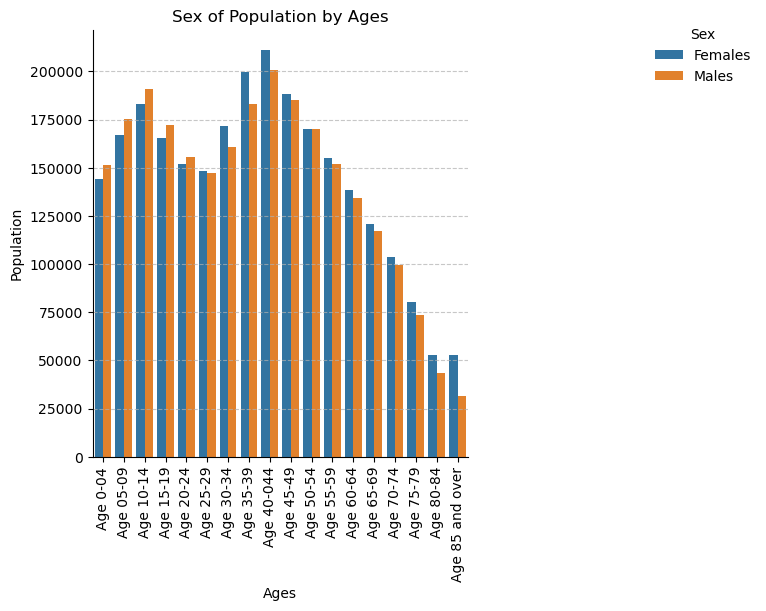

In [33]:
g = sns.catplot(
    x="Age",       # x variable name
    y="Value",       # y variable name
    hue="Sex",  # group variable name
    data=df_sex,     # dataframe to plot
    kind="bar",
)
plt.title('Sex of Population by Ages')
plt.xlabel('Ages')
plt.ylabel('Population')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)
#plt.tight_layout()
sns.move_legend(g, "upper center", bbox_to_anchor=(1.2, 1), title='Sex')
plt.show()

#### Scatterplot of Population

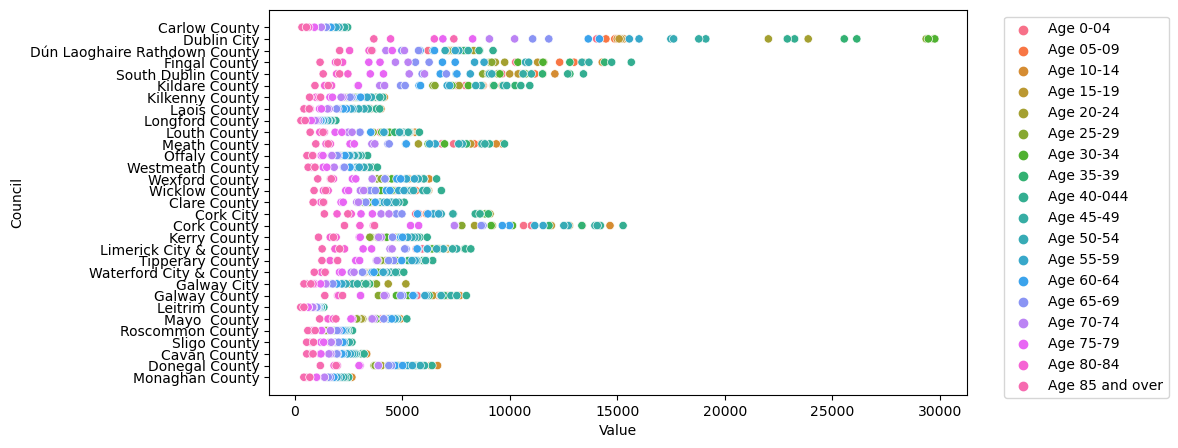

In [34]:
plt.figure(figsize=(9,5))
sns.scatterplot(data = df_population, x= "Value", y ="Council", hue="Age")
plt.legend(loc="upper right", bbox_to_anchor=(1.3,1))

# Statistic

Use two discrete distributions (Binomial and/or Poisson) in order to explain/identify some information about your dataset. You must explain your reasoning and the techniques you have used. Visualise your data and explain what happens with the large samples in these cases. You must work with Python and your mathematical reasoning must be documented in your report.


## Case 1

What is the probability that if a person is chosen from the population, this person will be a girl?

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


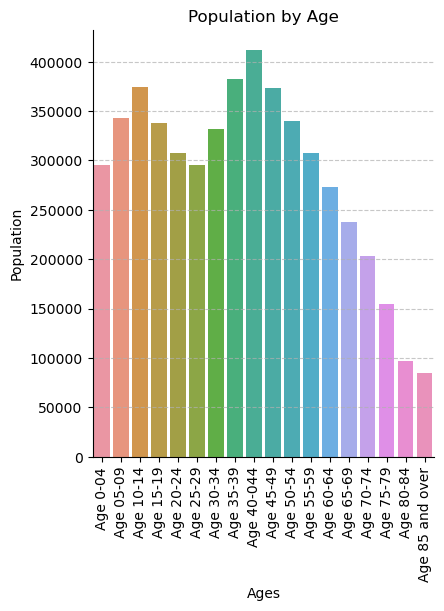

In [35]:
g = sns.catplot(
    x="Age",       # x variable name
    y="Value",       # y variable name
    data=df_age,     # dataframe to plot
    kind="bar",
)
plt.title('Population by Age')
plt.xlabel('Ages')
plt.ylabel('Population')
plt.xticks(rotation=90)
plt.grid(axis='y', linestyle='--', alpha=0.7)

The distribution has a Bimodal distribution. The most advisable thing is to obtain the probability by dividing into two groups 

The first group will include the following age groups:

    - Age 0-04
    - Age 05-09
    - Age 10-14
    - Age 15-19
    - Age 20-24
    - Age 25-29
    
The second will be:

    - Age 30-34
    - Age 35-39
    - Age 40-44
    - Age 45-49
    - Age 50-54
    - Age 55-59
    - Age 60-64
    - Age 65-69
    - Age 70-74
    - Age 75-79
    - Age 80-84
    - Age 80-85

In [36]:
total_people = df_age.Value.sum()
print(f"Total population {total_people}")

Total population 5149139


In [37]:
limit = "Age 25-29"
total_1st_people = 0
i = 0 
while i < len(df_age):       
    total_1st_people = total_1st_people + df_age.at[i, "Value"]
    if (df_age.at[i, "Age"] != limit):
        i = i + 1
    else:
        i = len(df_age)
print(f"Total 1r Group {total_1st_people}")
    

Total 1r Group 1952866


the percentage of this first group is:

In [38]:
porcentaje_1 = total_1st_people / total_people * 100
porcentaje_2 = 100 - porcentaje_1
print(f"Total percentage first Group {porcentaje_1}")

Total percentage first Group 37.92606880490117


In [39]:
porcentaje_2 = 100 - porcentaje_1
print(f"Total percentage second Group {porcentaje_2}")

Total percentage second Group 62.07393119509883


In [40]:
print(f"The probaility of take one person of the first group is {porcentaje_1}")

The probaility of take one person of the first group is 37.92606880490117


We need to split our data for use the distribution poison or binomial

### Data preparation and Visualization
2. You must also rationalise, justify, and detail all the methods used to prepare the data for ML (Scaling, Encoding, imputation etc…). [0-40]

### Data preparation and Visualization
3. Appropriate visualizations must be used to engender insight into the dataset and to illustrate your final insights gained in your analysis. [0-20]

### Statistics
2. Use two discrete distributions (Binomial and/or Poisson) in order to explain/identify some information about your dataset. You must explain your reasoning and the techniques you have used. Visualise your data and explain what happens with the large samples in these cases. You must work with Python and your mathematical reasoning must be documented in your report. [0-30]

### Statistics
3. Use Normal distribution to explain or identify some information about your dataset. [0-20]

### Statistics
4. Explain the importance of the distributions used in point 3 and 4 in your analysis. Justify the choice of the variables and explain if the variables used for the discrete distributions could be used as normal distribution in this case. [0-15]

### Machine learning for Data Analytics
1. Explain which project management framework  (CRISP-DM, KDD or SEMMA) is required for a data science project. Discuss and justify with real-life scenarios. Provide an explanation of why you chose a supervised, unsupervised, or semi-supervised machine learning technique for the dataset you used for ML modeling. [0 - 20]

### Machine learning for Data Analytics
2. Machine learning models have a wide range of uses, including prediction, classification, and clustering. It is advised that you assess several approaches (at least two), choose appropriate hyperparameters for the optimal outcomes of Machine Learning models using an approach of hyperparameter tunning, such as GridSearchCV or RandomizedSearchCV. [0 - 30]

### Machine learning for Data Analytics
3. Show the results of two or more ML modeling comparisons in a table or graph format. Review and critically examine the machine learning models' performance based on the selected metric for supervised, unsupervised, and semi-supervised approaches. [0 - 30]

### Machine learning for Data Analytics
4. Demonstrate the similarities and differences between your Machine Learning modelling results using the tables or visualizations. Provide a report along with an explanation and interpretation of the relevance and effectiveness of your findings. [0 - 20]

### Programming  
2. In a dedicated section in your report, discuss your use of aspects of various programming paradigms in the development of your project. For example, this may include (but is not limited to) how they influenced your design decisions or how they helped you solve problems. Note that marks may not be awarded if the discussion does not involve your specific project. [0-50]